In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-On Activity 7.3: Sampling the categorical

## Objectives

+ Demonstrate how we can sample from the Categorical distribution using uniform samples.


## Readings

+ These notes.

## Sampling the Bernoulli distribution
The Bernoulli distribution arises from a binary random variable representing the outcome of an experiment with a given probability of success.
Let us encode success with 1 and failure with 0.
It is a special case of the Categorical (2 labels).
Then, we say that the random variable
$$
X\sim \operatorname{Bernoulli}(\theta),
$$
is a Bernoulli random variable with parameter $\theta$ if:
$$
X = \begin{cases}
1,\;\text{with probability}\;\theta,\\
0,\;\text{otherwise}.
\end{cases}
$$
To sample from it, we do the following steps:

+ Sample a uniform number $u$ (i.e., a number of $U([0,1])$).

+ If $u\le \theta$, then set $x = 1$.

+ Otherwise, set $x = 0$.

Let's see if this process does indeed produce the desired result.

In [2]:
def sample_bernoulli(theta):
    """
    Samples from the Bernoulli.
    
    Arguments:
        theta    -    The probability of success.
    """
    u = np.random.rand()
    if u <= theta:
        return 1
    return 0

for _ in range(10):
    print(sample_bernoulli(0.5))

0
1
0
1
0
1
0
0
0
0


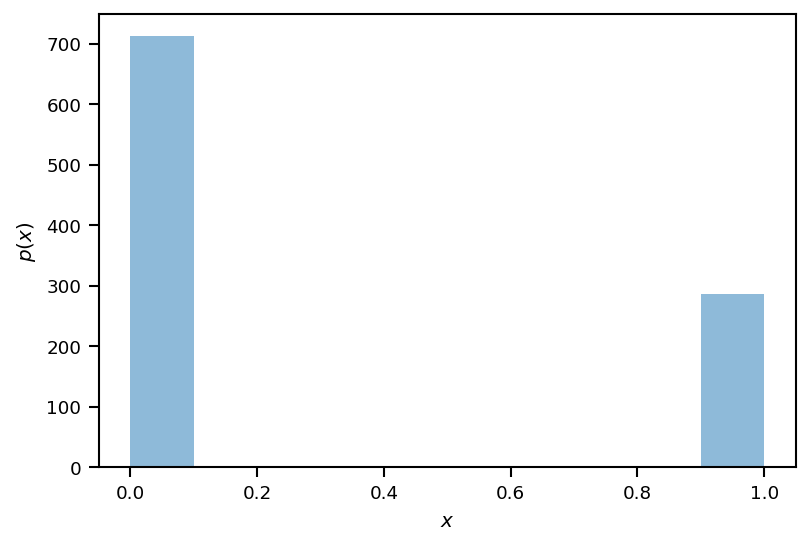

In [3]:
# Let's do a histogram like before
N = 1000
X = [sample_bernoulli(0.3) for _ in range(N)]
fig, ax = plt.subplots(dpi=150)
ax.hist(X, alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$');

Ok, it looks fine. About $\theta N$ samples went to 1 and $(1-\theta)N$ samples went to 0.

Of course, we have already seen that this is implemented in scipy.stats.
Here is a quick reminder of that code.

In [4]:
import scipy.stats as st
X = st.bernoulli(0.3)
X.rvs(size=10)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

## Sampling the $K$-label Categorical
Consider a generic discrete random variable $X$ taking $K$ different values.
Without loss of generality, you may assume that these values are integers $\{0, 1,2,\dots,K-1\}$ (they are just the labels of the discrete objects anyway).
Let us assume that
$$
p(X=k) = p_k,
$$
where, of course, we must have:
$$
p_k \ge 0,
$$
and
$$
\sum_{k=0}^{K-1} p_k = 1.
$$
Remember, that an succinct way to write this is using the Dirac delta:
$$
p(x) = \sum_{k=0}^{K-1}p_k\delta(x-k).
$$
In any case, here is how you sample from such a distribution:

+ Draw a uniform sample $u$.
+ Find the index $j\in\{0,1,\dots,K-1\}$ such that:
$$
\sum_{k=0}^{j-1}p_k \le u < \sum_{k=0}^jp_k.
$$
+ Then, your sample is $j$.

Let's code it.

In [5]:
def sample_categorical(p):
    """
    Sample from a discrete probability density.
    
    Arguments:
        p      -   An array specifying the probability of each possible state.
                   The number of states ``m=len(p)``.    
    """
    K = len(p)
    u = np.random.rand()
    c = 0.
    for j in range(K):
        c += p[j]
        if u <= c:
            return j

Text(0, 0.5, '$p(x)$')

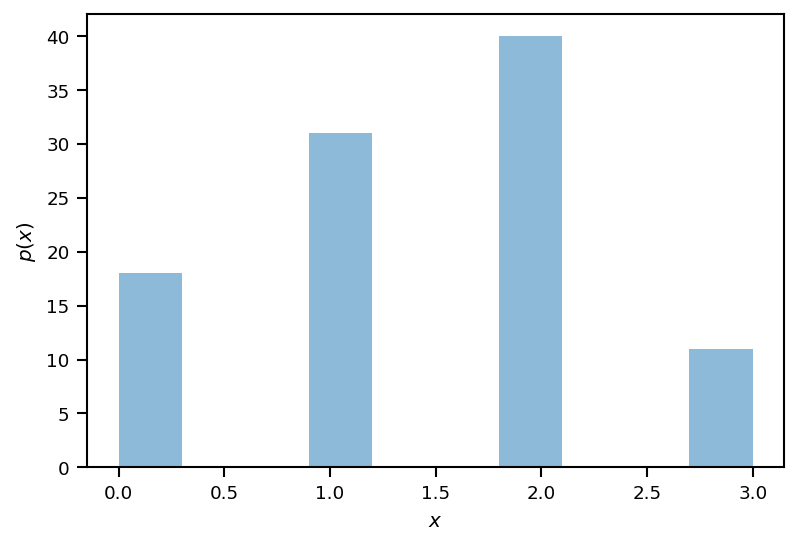

In [6]:
# Let's test it with a four-state discrete random variable with probabilities
p = [0.2, 0.3, 0.4, 0.1]
# Let's take 1,000 samples
N = 100
# The code below is known as a Generator
# https://wiki.python.org/moin/Generators
# I use it to avoid writing a for loop. It is shorter.
X = [sample_categorical(p) for _ in range(N)]
# and do the empirical histrogram
fig, ax = plt.subplots(dpi=150)
ax.hist(X, alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

Of course, ``scipy.stats`` already implements this functionality. Let's compare.

In [ ]:
K = len(p)
X_st = st.rv_discrete(values=(np.arange(K), p))
x_st_samples = X_st.rvs(size=N)

# Let's compare the two histograms
fig, ax = plt.subplots(dpi=150)
ax.hist(X, alpha=0.5, label='Our implementation')
ax.hist(x_st_samples, alpha=0.5, label='Scipy.stats implementation')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.legend(loc='best')

## Questions

+ It looks like there is a lot of variability every time you run the results. You need to go back to the code and increase the number of samples $N$ until the results stop changing. Then you should be able to observe that our code does exactly the same thing as ``scipy.stats.rv_discrete``.